# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD J Term 2023


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [1]:
import glob
import os
import PIL
import PIL.Image
import cv2

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.models import load_model
modelLoaded = load_model('checkPointCallBack.h5')
modelLoaded.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               3840128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 455       
Total params: 3,848,839
Trainable params: 3,848,839
Non-trainable params: 0
____________________________________________

In [4]:
PATH_SAVED = "dataProcessed"
files = glob.glob(PATH_SAVED + "/*.*")
classList = []

for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if type not in classList:
        classList.append(type)
print(classList)

np.random.seed(22)
np.random.shuffle(files)

data = []
target = []
for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if (type in classList):
        id = classList.index(type)
        target.append(id)

        im = cv2.imread (f, cv2.IMREAD_COLOR)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        array = tf.keras.preprocessing.image.img_to_array(im)
        # array.resize(DIM[0]))
        data.append(array)
        # plt.imshow(array/255)
        # break
    # print(data[0])

dataArray = np.array(data)
# dataArray = tf.expand_dims(dataArray, axis=-1)

['brick', 'concrete', 'floor', 'grass', 'roop', 'sidewalk', 'wall']


In [5]:
from tensorflow.keras.utils import to_categorical
targetOnehot = to_categorical(target)
len(targetOnehot[0])

7

In [6]:
print('sample total num: {}'.format(dataArray.shape[0]))
sampleNum = int(dataArray.shape[0] * 0.2)
print('sample val num: {}'.format(sampleNum))

sampleNumTest = int(sampleNum * 0.5)
print('sample test num: {}'.format(sampleNumTest))

sample total num: 427
sample val num: 85
sample test num: 42


In [7]:
trainX = dataArray[:-sampleNum]
val_test_X = dataArray[-sampleNum:]
testX = val_test_X[-sampleNumTest:]
valX = val_test_X[ :- sampleNumTest]


trainY = targetOnehot[:-sampleNum]
val_test_Y = targetOnehot[-sampleNum:]
testY = val_test_Y[ -sampleNumTest:]
valY = val_test_Y[ sampleNumTest:]

NUM_CLASS = len(targetOnehot[0])


In [8]:
print('Total num data:          ', dataArray.shape)
print('num data for train:      ', trainX.shape)
print('num data for validation: ', valX.shape)
print('num data for test:       ',  testX.shape)

Total num data:           (427, 100, 100, 3)
num data for train:       (342, 100, 100, 3)
num data for validation:  (43, 100, 100, 3)
num data for test:        (42, 100, 100, 3)


In [9]:
print('Total num data:          ', dataArray.shape)
print('num data for train:      ', trainY.shape)
print('num data for validation: ', valY.shape)
print('num data for test:       ',  testY.shape)

Total num data:           (427, 100, 100, 3)
num data for train:       (342, 7)
num data for validation:  (43, 7)
num data for test:        (42, 7)


In [10]:
predY = modelLoaded.predict(trainX)
print(predY)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 5.3588836e-32]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.8461488e-38 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


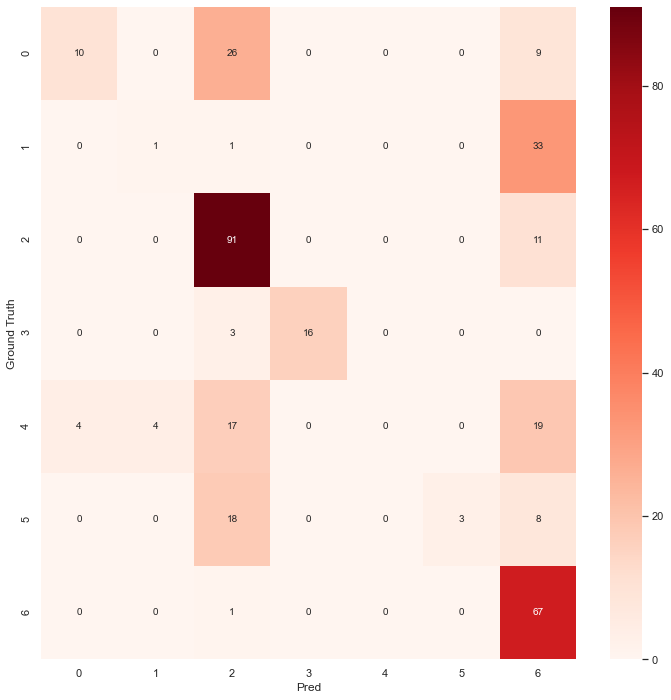

In [11]:
#  https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

import seaborn as sns
sns.set(style='dark')

yTestYOnehot = trainY

plt.figure(figsize=(12,12))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dropout (Dropout)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 2

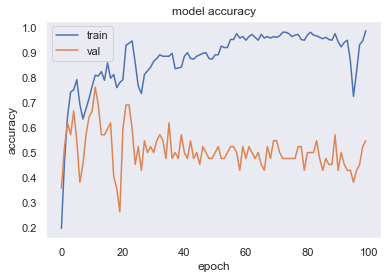

In [13]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.2),
        Dense(NUM_CLASS, activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
histSecond = modelSecond.fit(
    trainX, trainY, 
    epochs=100, batch_size=32,
    # verbose=0,
    validation_data=(testX, testY)
    )
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)

2/2 [==============================] - 0s 3ms/step - loss: 12.1396 - accuracy: 0.1628


[12.139616966247559, 0.1627907007932663]

In [15]:
# modelSecond = Sequential()
# modelSecond.add(Conv2D(128, kernel_size=(5,5), 
#                  input_shape=(100,100,3), 
#                  padding='valid', 
#                  activation='relu'))
# modelSecond.add(MaxPooling2D(
#                 pool_size=(2,2))
#                 )
# # modelSecond.add(Dropout(0.15))
# modelSecond.add(Conv2D(64, kernel_size=(3,3), 
#                  padding='valid', 
#                  activation='relu'))
# modelSecond.add(MaxPooling2D(
#                 pool_size=(2,2))
#                 )
# # modelSecond.add(Dropout(0.5))
# modelSecond.add(Flatten())
# modelSecond.add(Dense(32, activation='relu'))
# # modelSecond.add(Dropout(0.15))
# modelSecond.add(Dense(NUM_CLASS, activation='softmax'))
# print(modelSecond.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 18,894,791
Trainable params: 18,894,791
Non-trainable params: 0
__________________________________________

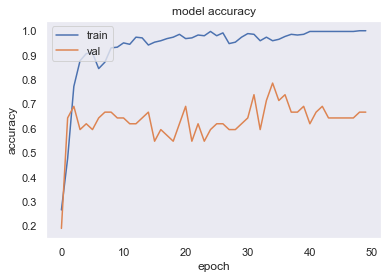

In [16]:
##model building
modelSecond = Sequential()
#convolutional layer with rectified linear unit activation
modelSecond.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,3)))
#32 convolution filters used each of size 3x3
#again
modelSecond.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
modelSecond.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
# modelSecond.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
modelSecond.add(Flatten())
#fully connected to get all relevant data
modelSecond.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
# modelSecond.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
modelSecond.add(Dense(NUM_CLASS, activation='softmax'))

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
histSecond = modelSecond.fit(
    trainX, trainY, 
    epochs=50, batch_size=32,
    verbose=0,
    validation_data=(testX, testY)
    )
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
modelSecond.evaluate(trainX, trainY)
modelSecond.evaluate(testX, testY)
modelSecond.evaluate(valX, valY)

2/2 [==============================] - 0s 11ms/step - loss: 33.7476 - accuracy: 0.1628


[33.747642517089844, 0.1627907007932663]

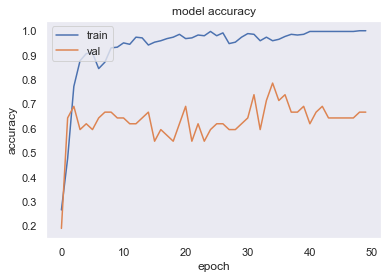

In [18]:
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()